In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import time
import seaborn as sns

#these are user defined modules

In [219]:
# Authors with Career length 
CAREER_LENGTH_LIST = [0,5,10,15,20,25]
CAREER_LENGTH = 0

authorStartEndCareerData = pd.read_csv('./data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year.csv')
print(authorStartEndCareerData.head())
print(authorStartEndCareerData.shape)

print('Filter to reduce data for estimate time')
authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData['career_length'] >= 45]
print(authorStartEndCareerData.head())
print(authorStartEndCareerData.shape)

                  author  start_year  end_year  total_num_pub  career_length
0       'maseka lesaoana        2001      2015              2             14
1  (max) zong-ming cheng        2009      2011              2              2
2       (zhou) bryan bai        2011      2012              2              1
3                  a lun        2010      2010              1              0
4             a min tjoa        1979      2015            193             36
(1708185, 5)
Filter to reduce data for estimate time
                 author  start_year  end_year  total_num_pub  career_length
23402    abraham berman        1971      2016              7             45
27514    adi ben-israel        1971      2016             18             45
42497  alain bensoussan        1970      2016             44             46
43571        alan bundy        1971      2016            171             45
44000   alan g. konheim        1971      2016             29             45
(180, 5)


In [220]:
finalData = pd.DataFrame(columns=['author','start_year'], data=authorStartEndCareerData[['author','start_year']])
# career length is important because it will help us to filter credible authors
# Career length is incremented by 1 because the previous data was calculated by just subtracting start_year from end_year.
# so, if author finishes his career on the same year he/she started then it will be 0 (instead value 1 is quite appropriate)
finalData['career_length']= authorStartEndCareerData['career_length'] + 1
print(finalData.head())
print(finalData[finalData['author'] == "'maseka lesaoana"])
print(finalData.shape)

                 author  start_year  career_length
23402    abraham berman        1971             46
27514    adi ben-israel        1971             46
42497  alain bensoussan        1970             47
43571        alan bundy        1971             46
44000   alan g. konheim        1971             46
Empty DataFrame
Columns: [author, start_year, career_length]
Index: []
(180, 3)


In [221]:
genderData = pd.read_csv('./data/name_gender_1970_2016_noAsians.csv')
genderData.rename(columns={'name':'author'}, inplace=True)
print(genderData.head())
print(genderData.shape)

             author gender
0    nima mesgarani      m
1    james j. abbas      m
2  eberhart zrenner      m
3    emery n. brown      m
4        ilya rybak      m
(5793845, 2)


In [222]:
finalData = pd.merge(finalData, genderData, how="left", on=["author"])
# for authors whose gender not found, replace it with none
finalData['gender'] = finalData['gender'].fillna('none')
print(finalData.head())

print("finalData with duplicates: %s", finalData.shape[0])
finalData = finalData.drop_duplicates()
print("finalData no duplicates: %s", finalData.shape[0])
print('Gender  - ',finalData['gender'].unique())

finalData = finalData.set_index(['author'])
print(finalData.head())
print(finalData.shape)

           author  start_year  career_length gender
0  abraham berman        1971             46      m
1  abraham berman        1971             46      m
2  abraham berman        1971             46      m
3  abraham berman        1971             46      m
4  abraham berman        1971             46      m
('finalData with duplicates: %s', 11135)
('finalData no duplicates: %s', 180)
('Gender  - ', array(['m', 'none', 'f'], dtype=object))
                  start_year  career_length gender
author                                            
abraham berman          1971             46      m
adi ben-israel          1971             46      m
alain bensoussan        1970             47      m
alan bundy              1971             46   none
alan g. konheim         1971             46   none
(180, 3)


In [223]:
publicationData = pd.read_csv('./data/author_publications_1970_2016_asiansAsNone.txt')
print(publicationData.head())
print(publicationData.shape)

print('Filter to reduce data for estimate time')
publicationData = publicationData[publicationData['author'].isin(finalData.index.values)]
print(publicationData.head())
print(publicationData.shape)

             author  year                    pub_id
0  kim l. blackwell  2014  55503da645ce0a409eb273e8
1    nima mesgarani  2014  55503da645ce0a409eb273e9
2    james j. abbas  2014  55503da645ce0a409eb273ea
3  eberhart zrenner  2014  55503da645ce0a409eb273ec
4    jonathan rubin  2014  55503da645ce0a409eb273e0
(9078240, 3)
Filter to reduce data for estimate time
                author  year                    pub_id
1910    saharon shelah  2001  53e9a488b7602d9702da780a
2066   robert schaback  2013  53e9b1bcb7602d9703c4dfa5
2126          b. smith  2015  555043a845ce0a409eb48aab
2205   thomas s. huang  2012  53e9a5dbb7602d9702f07438
2328  its'hak dinstein  1995  53e9ab25b7602d97034b17b3
(18291, 3)


In [224]:
citationData = pd.read_csv('./data/citations_1970_2016_asiansAsNone.txt')
print(citationData.head())
# publication with id1 cited the publication with id2 in the year 'year'

# We cannot use the author citation data which is in 'authors_cite_2016_asiansAsNone.txt' file because we will not know for 
# what paper the author has cited other author in a certain year
print(citationData.shape)


                        id1                       id2  year
0  53e9aa9cb7602d97034143d8  53e9aebdb7602d97038e692d  1994
1  53e99ca1b7602d9702555df6  53e9be3db7602d9704afc6b4  2006
2  53e99ca1b7602d9702555df6  53e9b9a0b7602d970458eee4  2006
3  53e99ca1b7602d9702555df6  53e9bc05b7602d9704866048  2006
4  53e9b166b7602d9703bebb75  53e9bba1b7602d97047ebb5d  2006
(7849398, 3)


In [225]:
publicationWithCitationData = pd.merge(left=publicationData, right=citationData[['id2', 'year']], how='left', \
                                       left_on='pub_id', right_on='id2')
print(publicationWithCitationData.head())
publicationWithCitationData.rename(columns={'year_x':'pub_year','year_y':'cited_year'}, inplace=True)
#cmpData = publicationWithCitationData['pub_id'] == publicationWithCitationData['id2']
#print(cmpData.unique()) 
## both the columns represent the same and so can be removed
publicationWithCitationData = publicationWithCitationData.drop(['id2'],axis=1)
print(publicationWithCitationData.head())

print(publicationWithCitationData.shape)

            author  year_x                    pub_id  \
0   saharon shelah    2001  53e9a488b7602d9702da780a   
1  robert schaback    2013  53e9b1bcb7602d9703c4dfa5   
2         b. smith    2015  555043a845ce0a409eb48aab   
3  thomas s. huang    2012  53e9a5dbb7602d9702f07438   
4  thomas s. huang    2012  53e9a5dbb7602d9702f07438   

                        id2  year_y  
0                       NaN     NaN  
1                       NaN     NaN  
2                       NaN     NaN  
3  53e9a5dbb7602d9702f07438    2013  
4  53e9a5dbb7602d9702f07438    2013  
            author  pub_year                    pub_id  cited_year
0   saharon shelah      2001  53e9a488b7602d9702da780a         NaN
1  robert schaback      2013  53e9b1bcb7602d9703c4dfa5         NaN
2         b. smith      2015  555043a845ce0a409eb48aab         NaN
3  thomas s. huang      2012  53e9a5dbb7602d9702f07438        2013
4  thomas s. huang      2012  53e9a5dbb7602d9702f07438        2013
(98579, 4)


### Iterative approach to calculate the parameters
The estimated time to calculate is 20 days.

In [226]:
# i = 0

# # same year and <= next 2 years
# PUBLICATION_RECORDING_YEARS = [0, 1, 2]
# CAREER_LENGTH = 15
# # same year and the next 2 years
# # 15 year is also included
# CITATION_RECORDING_YEAR_LIST = [0, 1, 2] 

# NO_OF_TOP_CITATIONS = 3

# '''
# column_names = ['author', 
#                 'npub_yr1','ncit_yr1_pub_yr1','ncit_yr2_pub_yr1', 'ncit_yr3_pub_yr1', 'ncit_yr15_pub_yr1',
#                 'npub_yr2','ncit_yr1_pub_yr2','ncit_yr2_pub_yr2', 'ncit_yr3_pub_yr2', 'ncit_yr15_pub_yr2',
#                 'npub_yr3','ncit_yr1_pub_yr3','ncit_yr2_pub_yr3', 'ncit_yr3_pub_yr3', 'ncit_yr15_pub_yr3',
#                 'npub_yr15','ncit_yr15_pub_yr15', 'ncit_yr15_top_3_pub'
#                ]
# '''

# column_names = ['author']
# for pub_yr in PUBLICATION_RECORDING_YEARS:
#     temp = 'npub_yr'
#     column_names.append(temp+str(pub_yr+1))
#     for cit_yr in CITATION_RECORDING_YEAR_LIST:
#         temp1 = 'ncit_yr'+str(cit_yr+1)+'_pub_yr'+str(pub_yr+1)
#         column_names.append(temp1)
#     column_names.append('ncit_yr'+str(CAREER_LENGTH)+'_pub_yr'+str(pub_yr+1))

# column_names.append('npub_yr'+str(CAREER_LENGTH))
# column_names.append('ncit_yr'+str(CAREER_LENGTH)+'_pub_yr'+str(CAREER_LENGTH))
# column_names.append('ncit_yr'+str(CAREER_LENGTH)+'_top_'+str(NO_OF_TOP_CITATIONS)+'_pub')

# print(column_names)
# print(len(finalData.values))

# specificAuthorOutputValuesList = []
# for specificAuthor in finalData.values: 
#     authorName = specificAuthor[0] 
#     startYear = specificAuthor[1] 
#     #careerLength = specificAuthor[2] 
#     gender = specificAuthor[3] 
    
#     specificAuthorOutputValues = []
#     #'author' name is added
#     specificAuthorOutputValues.append(authorName)
    
#     # filter the data only for the specific author and consider their career only for specified CAREER_LENGTH
#     authorSpecificData = publicationWithCitationData[publicationWithCitationData['author'] == authorName]
#     authorSpecificData = authorSpecificData[authorSpecificData['pub_year'] <= (startYear + CAREER_LENGTH - 1)]
#     #print(authorSpecificData)
    
#     #go through the required career age (PUBLICATION_RECORDING_YEARS) and consider the papers written
#     # look for citations for those papers in the required career age (CITATION_RECORDING_YEAR_LIST)
#     for prod_year in PUBLICATION_RECORDING_YEARS:
#         authorPublications = authorSpecificData[authorSpecificData['pub_year'] <= \
#                                                 (startYear + prod_year)]['pub_id'].unique()
#         tempData = authorSpecificData[authorSpecificData['pub_id'].isin(authorPublications)]
#         # no. of publications untill 'prod_year' year
#         specificAuthorOutputValues.append(len(authorPublications))
        
#         for citation_year in CITATION_RECORDING_YEAR_LIST:
#             temp1Data = tempData[tempData['cited_year'] <= (startYear + prod_year + citation_year)]
#             #print(temp1Data)

#             #no. of citations for specified papers untill 'citation_year' year
#             #count() - does not count the NaN values - this is important because some publications are not cited by others
#             specificAuthorOutputValues.append(temp1Data['cited_year'].count())

#         #no. of citations untill CAREER_LENGTH - 15th year is also included
#         specificAuthorOutputValues.append(tempData['cited_year'].count())
    
#     # no. of papers published untill CAREER_LENGTH - 15 years and the citations for it is included
#     specificAuthorOutputValues.append(authorSpecificData['pub_id'].nunique())
#     specificAuthorOutputValues.append(authorSpecificData['cited_year'].count())
    
#     temp = authorSpecificData[['author','pub_id','cited_year']].groupby(['author','pub_id']).count().reset_index()
#     temp = temp.sort_values(by=['cited_year'], ascending=False).head(NO_OF_TOP_CITATIONS).sum()['cited_year']
#     #print(temp)
#     #sum of no. of citations for top 'NO_OF_TOP_CITATIONS' - 3 papers are added
#     specificAuthorOutputValues.append(temp)

#     #print(specificAuthorOutputValues)
#     specificAuthorOutputValuesList.append(specificAuthorOutputValues)
#     # only for debugging (to reduce the dataset)
#     i = i + 1
#     if i%100 == 0:
#         print(i)
# #     if i >= 10:
# #         break
        
# dFrame = pd.DataFrame(columns=column_names, data=specificAuthorOutputValuesList)
# #print(dFrame.head())
# finalData = pd.merge( left=finalData, right=dFrame, how='inner', on=['author'])
# print(finalData.head())

# #finalData.to_csv('./data/author-career-short-snapshot.csv', index=False)

In [227]:
publicationWithCitationData[publicationWithCitationData['author'] == 'abraham berman']

,author,pub_year,pub_id,cited_year
5748,abraham berman,2003,53e9aa66b7602d97033da2f6,NaN
30524,abraham berman,1988,53e9ac12b7602d97035d67d0,2010
30525,abraham berman,1988,53e9ac12b7602d97035d67d0,2002
46257,abraham berman,1993,53e9ac54b7602d9703625cc2,2012
54761,abraham berman,1971,573695d36e3b12023e4eb4d2,NaN
57675,abraham berman,2009,53e9ae3cb7602d9703851a3d,NaN
60447,abraham berman,2001,53e99bdcb7602d970248659e,2008
60448,abraham berman,2001,53e99bdcb7602d970248659e,2005
60449,abraham berman,2001,53e99bdcb7602d970248659e,2014
60450,abraham berman,2001,53e99bdcb7602d970248659e,2014


In [259]:
i = 0

# same year and <= next 2 years
CAREER_LENGTH = 15
PUBLICATION_RECORDING_YEAR_LIST = [3, 2, 1]

# same year and the next 2 years
# 15 year is also included
CITATION_RECORDING_YEAR_LIST = [3, 2, 1] 

NO_OF_TOP_CITATIONS = 3

'''
column_names = ['author', 
                'npub_yr1','ncit_yr1_pub_yr1','ncit_yr2_pub_yr1', 'ncit_yr3_pub_yr1', 'ncit_yr15_pub_yr1',
                'npub_yr2','ncit_yr1_pub_yr2','ncit_yr2_pub_yr2', 'ncit_yr3_pub_yr2', 'ncit_yr15_pub_yr2',
                'npub_yr3','ncit_yr1_pub_yr3','ncit_yr2_pub_yr3', 'ncit_yr3_pub_yr3', 'ncit_yr15_pub_yr3',
                'npub_yr15','ncit_yr15_pub_yr15', 'ncit_yr15_top_3_pub'
               ]


column_names = ['author']
for pub_yr in PUBLICATION_RECORDING_YEARS:
    temp = 'npub_yr'
    column_names.append(temp+str(pub_yr))
    for cit_yr in CITATION_RECORDING_YEAR_LIST:
        temp1 = 'ncit_yr'+str(pub_yr+cit_yr-1)+'_pub_yr'+str(pub_yr)
        column_names.append(temp1)
    column_names.append('ncit_yr'+str(CAREER_LENGTH)+'_pub_yr'+str(pub_yr))

column_names.append('npub_yr'+str(CAREER_LENGTH))
column_names.append('ncit_yr'+str(CAREER_LENGTH)+'_pub_yr'+str(CAREER_LENGTH))
column_names.append('ncit_yr'+str(CAREER_LENGTH)+'_top_'+str(NO_OF_TOP_CITATIONS)+'_pub')

print(column_names)
'''

print(len(finalData.values))
start_time = time.time()

dataGroupByAuthor = publicationWithCitationData.groupby(['author'], sort=False)
pubDataMaxCareerAge = dataGroupByAuthor.apply(lambda group: group[group['pub_year'] <= (group['pub_year'].min() + CAREER_LENGTH - 1)])
tmpName = 'npub_yr'+str(CAREER_LENGTH)
finalData[tmpName] = pubDataMaxCareerAge[['author','pub_id']].groupby(['author'], sort=False)['pub_id'].nunique()

# print('At the beginning')
# print(pubDataMaxCareerAge[pubDataMaxCareerAge['author'] == 'abraham berman'])

dataGroupByAuthor= pubDataMaxCareerAge.groupby(['author'], sort=False)
citDataMaxCareerAge = dataGroupByAuthor.apply(lambda group: group[group['cited_year'] <= (group['pub_year'].min() + CAREER_LENGTH - 1)])
tmpName = 'ncit_yr'+str(CAREER_LENGTH)+'_pub_yr'+str(CAREER_LENGTH)
finalData[tmpName] = citDataMaxCareerAge[['author','cited_year']].groupby(['author'], sort=False)['cited_year'].count()

temp = citDataMaxCareerAge[['author','pub_id','cited_year']].groupby(['author','pub_id']).count()
temp = temp.sort_values(by=['cited_year'], ascending=False).reset_index()
temp = temp.groupby(['author']).nth(range(NO_OF_TOP_CITATIONS)).reset_index()
tmpName = 'ncit_yr'+str(CAREER_LENGTH)+'_top_'+str(NO_OF_TOP_CITATIONS)+'_pub'
finalData[tmpName] = temp.groupby(['author']).sum()

tmpPubData = pubDataMaxCareerAge

# print('At the beginning - after 15yr citations')
# print(tmpPubData[tmpPubData['author'] == 'abraham berman'])

for pub_yr in PUBLICATION_RECORDING_YEAR_LIST:

    tmpGroup = tmpPubData.groupby(['author'], sort=False)
    tmpPubData = tmpGroup.apply(lambda group: group[group['pub_year'] <= (group['pub_year'].min() + pub_yr - 1)])
    tmpName = 'npub_yr'+str(pub_yr)
    finalData[tmpName] = tmpPubData[['author','pub_id']].groupby(['author'], sort=False)['pub_id'].nunique()
    
#     print('After 1yr publication 15yr citations')
#     print(tmpPubData[tmpPubData['author'] == 'abraham berman'])
    
    tmpGroup= tmpPubData.groupby(['author'], sort=False)
    tmpCitData = tmpGroup.apply(lambda group: group[group['cited_year'] <= (group['pub_year'].min() + CAREER_LENGTH - 1)])
    tmpName = 'ncit_yr'+str(CAREER_LENGTH)+'_pub_yr'+str(pub_yr)
    finalData[tmpName] = tmpCitData[['author','cited_year']].groupby(['author'], sort=False)['cited_year'].count() 

    for cit_yr in CITATION_RECORDING_YEAR_LIST:
    
        tmpGroup= tmpCitData.groupby(['author'], sort=False)
        tmpCitData = tmpGroup.apply(lambda group: group[group['cited_year'] <= (group['pub_year'].min() + pub_yr - 1 + cit_yr - 1)])
        tmpName = 'ncit_yr'+str(cit_yr - 1 + pub_yr)+'_pub_yr'+str(pub_yr)
        finalData[tmpName] = tmpCitData[['author','cited_year']].groupby(['author'], sort=False)['cited_year'].count()

finalData.fillna(0, inplace=True)
#print(finalData.head())
end_time = time.time()
print((end_time-start_time), 'seconds')

180
(2.9321210384368896, 'seconds')


In [260]:
finalData.to_csv('./data/author-career-short-snapshot.csv', index=False)

### The rest (mostly to be deleted)

In [258]:
print(publicationWithCitationData.shape)
print(publicationWithCitationData['author'].nunique())
print(publicationWithCitationData[publicationWithCitationData['author'] == 'abraham berman'])


temp = publicationWithCitationData[['author','pub_id','cited_year']].groupby(['author','pub_id']).count()
print(type(temp))

temp = temp.sort_values(by='cited_year', ascending=False).reset_index()
print(temp.shape)
temp = temp.groupby(['author']).nth(range(NO_OF_TOP_CITATIONS)).reset_index()
print(temp.shape)

temp = temp.groupby(['author']).sum().reset_index()

print(type(temp))
print(type(temp))

print(temp[temp['author'] == 'abraham berman'])


(98579, 4)
180
               author  pub_year                    pub_id  cited_year
5748   abraham berman      2003  53e9aa66b7602d97033da2f6         NaN
30524  abraham berman      1988  53e9ac12b7602d97035d67d0        2010
30525  abraham berman      1988  53e9ac12b7602d97035d67d0        2002
46257  abraham berman      1993  53e9ac54b7602d9703625cc2        2012
54761  abraham berman      1971  573695d36e3b12023e4eb4d2         NaN
57675  abraham berman      2009  53e9ae3cb7602d9703851a3d         NaN
60447  abraham berman      2001  53e99bdcb7602d970248659e        2008
60448  abraham berman      2001  53e99bdcb7602d970248659e        2005
60449  abraham berman      2001  53e99bdcb7602d970248659e        2014
60450  abraham berman      2001  53e99bdcb7602d970248659e        2014
60451  abraham berman      2001  53e99bdcb7602d970248659e        2008
86051  abraham berman      2016  573695f66e3b12023e50a930         NaN
<class 'pandas.core.frame.DataFrame'>
(17694, 3)
(539, 3)
<class 'pandas.co

In [ ]:
finalData

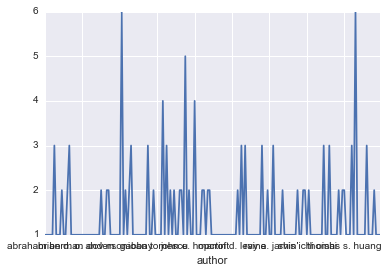

In [203]:
finalData.drop(['start_year','career_length'],axis=1)['npub_yr1'].plot()